In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
team_stats = pd.read_csv('/Users/benstager/Desktop/fantasy/data/team_stats_by_position.csv')
team_scoring = pd.read_csv('/Users/benstager/Desktop/fantasy/data/scoreboard.csv')
team_pivot_scoring = pd.read_csv('/Users/benstager/Desktop/fantasy/data/scoreboard_pivot.csv')
PR = pd.read_csv('/Users/benstager/Desktop/fantasy/data/SPR.csv')

In [82]:
weeks = [1,2]

current_year_stats = team_stats[(team_stats['year'] == 2025) & (team_stats['week'].isin(weeks))]
current_year_scoring = team_scoring[(team_scoring['year'] == 2025) & (team_scoring['week'].isin(weeks))]
current_year_pivot_scoring = team_pivot_scoring[(team_pivot_scoring['year'] == 2025) & (team_pivot_scoring['week'].isin(weeks))]

teams = current_year_stats['team'].unique()

In [55]:
team_grouped = current_year_stats.groupby(['team', 'started_nonstarted']).agg({'player_scored':'mean', 'player_projected':'mean'}).reset_index()

In [56]:
x = team_grouped.groupby('started_nonstarted')['player_scored'].max()

team_grouped[(team_grouped['player_scored'].isin(x)) & (team_grouped['started_nonstarted'] != 'IR')]

,team,started_nonstarted,player_scored,player_projected
11,LeFantasy Football,K,17.000000,8.315000
20,Mat Noment Oens,QB,27.830000,22.380000
22,Mat Noment Oens,TE,17.150000,9.620000
45,Small PP team,RB,22.050000,18.262500
57,Swordless Mimetown,BE,11.585714,11.419286
72,Team Rock,WR,23.425000,16.295000
75,That was the dagger,FLEX,18.000000,12.330000
86,Tiitsburgh Feelers,K,11.500000,7.955000
92,Zilwaukee Chudwick,D/ST,11.500000,7.245000


In [8]:
current_year_pivot_scoring

NameError: name 'current_year_pivot_scoring' is not defined

In [187]:
grouped = current_year_pivot_scoring.groupby('team').agg({'score':'mean', 'projected':'mean', 'allowed':'mean'})

grouped

,score,projected,allowed
team,,,
Dee Wuffest,121.90,116.860,106.41
LeFantasy Football,113.09,123.235,123.46
Mat Noment Oens,115.18,126.900,110.39
Otay MyMan,103.81,123.585,103.27
PBR Kayla,91.05,117.005,126.41
Small PP team,120.61,123.260,114.67
Straw Hat,113.14,120.865,111.33
Swordless Mimetown,99.43,114.880,128.93
Team Rock,114.76,123.905,111.75


/var/folders/87/rbsvb18s08x2_20r3q58gdjw0000gn/T/ipykernel_6233/984390388.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(grouped['score'][i], grouped['allowed'][i], team.split(' ')[1], fontsize=12, ha='right')


Text(0.5, 1.0, 'through week 2')

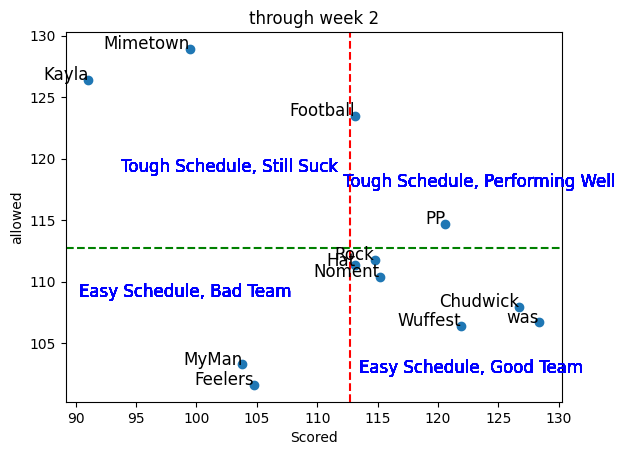

In [202]:
plt.scatter(grouped['score'], grouped['allowed'])
plt.axvline(x=grouped['score'].mean(), color='r', linestyle='--')
plt.axhline(y=grouped['allowed'].mean(), color='g', linestyle='--')
plt.xlabel('Scored')
plt.ylabel('allowed')


# Add labels to each point
for i, team in enumerate(grouped.index):
    plt.text(grouped['score'][i], grouped['allowed'][i], team.split(' ')[1], fontsize=12, ha='right')
    # Label each quadrantx
    plt.text(grouped['score'].mean() - 10, grouped['allowed'].max() - 10, 'Tough Schedule, Still Suck', color='blue', fontsize=12, ha='center')
    plt.text(grouped['score'].mean() + 10, grouped['allowed'].min() + 1, 'Easy Schedule, Good Team', color='blue', fontsize=12, ha='center')
    plt.text(grouped['score'].min() + 8, grouped['allowed'].mean() - 4, 'Easy Schedule, Bad Team', color='blue', fontsize=12, ha='center')
    plt.text(grouped['score'].max() - 5, grouped['allowed'].mean() + 5, 'Tough Schedule, Performing Well', color='blue', fontsize=12, ha='center')

plt.title("through week 2")

/var/folders/87/rbsvb18s08x2_20r3q58gdjw0000gn/T/ipykernel_6233/4119414979.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(grouped['score'][i], grouped['projected'][i], team.split(' ')[1], fontsize=12, ha='right')


Text(0.5, 1.0, 'through week 2')

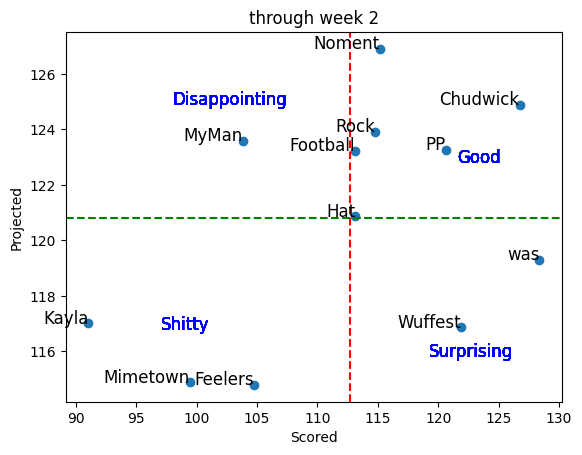

In [159]:
plt.scatter(grouped['score'], grouped['projected'])
plt.axvline(x=grouped['score'].mean(), color='r', linestyle='--')
plt.axhline(y=grouped['projected'].mean(), color='g', linestyle='--')
plt.xlabel('Scored')
plt.ylabel('Projected')


# Add labels to each point
for i, team in enumerate(grouped.index):
    plt.text(grouped['score'][i], grouped['projected'][i], team.split(' ')[1], fontsize=12, ha='right')
    # Label each quadrantx
    plt.text(grouped['score'].mean() - 10, grouped['projected'].max() - 2, 'Disappointing', color='blue', fontsize=12, ha='center')
    plt.text(grouped['score'].mean() + 10, grouped['projected'].min() + 1, 'Surprising', color='blue', fontsize=12, ha='center')
    plt.text(grouped['score'].min() + 8, grouped['projected'].mean() - 4, 'Shitty', color='blue', fontsize=12, ha='center')
    plt.text(grouped['score'].max() - 5, grouped['projected'].mean() + 2, 'Good', color='blue', fontsize=12, ha='center')

plt.title("through week 2")

In [160]:
current_year_scoring

,Unnamed: 0,year,week,home_team,home_team_first_name,home_score,home_projected,away_team,away_team_first_name,away_score,away_projected,winner
168,0,2025,1,Swordless Mimetown,Hayden,81.12,113.63,Tiitsburgh Feelers,Gavin,113.52,122.85,Team(Tiitsburgh Feelers )
169,0,2025,1,Small PP team,Greenberg,116.88,123.95,Dee Wuffest,Jake,121.72,116.27,Team(Dee Wuffest)
170,0,2025,1,Otay MyMan,Cawley,104.92,123.84,Straw Hat,Cash,81.94,123.49,Team(Otay MyMan)
171,0,2025,1,Zilwaukee Chudwick,Chad,122.58,125.61,LeFantasy Football,Ethan,118.56,124.14,Team(Zilwaukee Chudwick)
172,0,2025,1,That was the dagger,DC,118.08,121.36,Mat Noment Oens,Harry,105.76,130.17,Team(That was the dagger)
173,0,2025,1,Team Rock,Calvin,121.92,120.50,PBR Kayla,Stager,84.82,117.22,Team(Team Rock)
174,0,2025,2,Tiitsburgh Feelers,Gavin,95.94,106.73,Dee Wuffest,Jake,122.08,117.45,Team(Dee Wuffest)
175,0,2025,2,Straw Hat,Cash,144.34,118.24,Swordless Mimetown,Hayden,117.74,116.13,Team(Straw Hat)
176,0,2025,2,LeFantasy Football,Ethan,107.62,122.33,Small PP team,Greenberg,124.34,122.57,Team(Small PP team)
177,0,2025,2,Mat Noment Oens,Harry,124.60,123.63,Otay MyMan,Cawley,102.70,123.33,Team(Mat Noment Oens)


In [170]:
current_year_pivot_scoring.groupby('team').agg({'score':'mean'}).sort_values(by='score', ascending=False)

,score
team,
That was the dagger,128.38
Zilwaukee Chudwick,126.74
Dee Wuffest,121.90
Small PP team,120.61
Mat Noment Oens,115.18
Team Rock,114.76
Straw Hat,113.14
LeFantasy Football,113.09
Tiitsburgh Feelers,104.73


In [215]:
vals

[2,
 ['That was the dagger',
  'Zilwaukee Chudwick',
  'Dee Wuffest',
  'Small PP Team',
  'Team Rock',
  'Straw Hat',
  'Mat Noment Oens',
  'Otay MyMan',
  'LeFantasy Football',
  'Tittsburgh Feelers',
  'Swordless Mimetown',
  'PBR Kayla']]

In [2]:
import pandas as pd

In [4]:
PR = pd.read_csv('/Users/benstager/Desktop/fantasy/data/SPR.csv')

In [6]:
PR = PR.iloc[0]

In [7]:
new_slots = ['That was the dagger',
'Zilwaukee Chudwick',
'Dee Wuffest',
'Small PP Team',
'Team Rock',
'Straw Hat',
'Mat Noment Oens',
'Otay MyMan',
'LeFantasy Football',
'Tittsburgh Feelers',
'Swordless Mimetown',
'PBR Kayla']

cols = ['Week']
[cols.extend(f'#{i}' for i in range(1,13))]

vals = [2] + new_slots

final = pd.DataFrame({i:j for i,j in zip(cols, vals)},index=[0])

pd.concat([PR, final]).to_csv('/Users/benstager/Desktop/fantasy/data/SPR.csv', index=False)

In [7]:
pd.concat([PR, final]).to_csv('/Users/benstager/Desktop/fantasy/data/SPR.csv')

In [222]:
display(current_year_scoring[current_year_scoring['week'] == 1])

,Unnamed: 0,year,week,home_team,home_team_first_name,home_score,home_projected,away_team,away_team_first_name,away_score,away_projected,winner
168,0,2025,1,Swordless Mimetown,Hayden,81.12,113.63,Tiitsburgh Feelers,Gavin,113.52,122.85,Team(Tiitsburgh Feelers )
169,0,2025,1,Small PP team,Greenberg,116.88,123.95,Dee Wuffest,Jake,121.72,116.27,Team(Dee Wuffest)
170,0,2025,1,Otay MyMan,Cawley,104.92,123.84,Straw Hat,Cash,81.94,123.49,Team(Otay MyMan)
171,0,2025,1,Zilwaukee Chudwick,Chad,122.58,125.61,LeFantasy Football,Ethan,118.56,124.14,Team(Zilwaukee Chudwick)
172,0,2025,1,That was the dagger,DC,118.08,121.36,Mat Noment Oens,Harry,105.76,130.17,Team(That was the dagger)
173,0,2025,1,Team Rock,Calvin,121.92,120.50,PBR Kayla,Stager,84.82,117.22,Team(Team Rock)


In [287]:
display(current_year_scoring[current_year_scoring['week'] == 2])

,Unnamed: 0,year,week,home_team,home_team_first_name,home_score,home_projected,away_team,away_team_first_name,away_score,away_projected,winner
174,0,2025,2,Tiitsburgh Feelers,Gavin,95.94,106.73,Dee Wuffest,Jake,122.08,117.45,Team(Dee Wuffest)
175,0,2025,2,Straw Hat,Cash,144.34,118.24,Swordless Mimetown,Hayden,117.74,116.13,Team(Straw Hat)
176,0,2025,2,LeFantasy Football,Ethan,107.62,122.33,Small PP team,Greenberg,124.34,122.57,Team(Small PP team)
177,0,2025,2,Mat Noment Oens,Harry,124.60,123.63,Otay MyMan,Cawley,102.70,123.33,Team(Mat Noment Oens)
178,0,2025,2,PBR Kayla,Stager,97.28,116.79,Zilwaukee Chudwick,Chad,130.90,124.18,Team(Zilwaukee Chudwick)
179,0,2025,2,Team Rock,Calvin,107.60,127.31,That was the dagger,DC,138.68,117.21,Team(That was the dagger)


In [230]:
leaders = current_year_stats.groupby(['team', 'started_nonstarted']).agg({'player_scored':['sum', 'mean', 'std']}).reset_index()

In [240]:
pd.set_option('display.max_rows', 100)

In [242]:
leaders = current_year_stats.groupby(['team', 'started_nonstarted']).agg({'player_scored':['sum', 'mean', 'std']}).reset_index()
leaders.sort_values(['started_nonstarted', ('player_scored', 'sum')], ascending=False)

team started_nonstarted player_scored                      
                                                     sum       mean        std
72            Team Rock                 WR         93.70  23.425000   6.111942
56            Straw Hat                 WR         75.20  18.800000  13.551630
99   Zilwaukee Chudwick                 WR         69.40  17.350000   5.794538
64   Swordless Mimetown                 WR         64.30  16.075000  14.087672
7           Dee Wuffest                 WR         62.20  15.550000  15.914459
15   LeFantasy Football                 WR         61.00  15.250000   7.106101
31           Otay MyMan                 WR         45.60  11.400000   4.254409
90  Tiitsburgh Feelers                  WR         44.10  11.025000   8.077283
81  That was the dagger                 WR         42.70  10.675000   3.343028
47        Small PP team                 WR         38.90   9.725000   4.875363
39            PBR Kayla                 WR         27.40   6.850000   3.418089
23      Mat Noment Oens                 WR         26.30   6.575000   4.926375
22      Mat Noment Oens                 TE         34.30  17.150000  10.253048
80  That was the dagger                 TE         29.30  14.650000   3.040559
38            PBR Kayla                 TE         26.80  13.400000   2.121320
55            Straw Hat                 TE         25.90  12.950000   1.202082
71            Team Rock                 TE         24.10  12.050000   4.596194
89  Tiitsburgh Feelers                  TE         22.80  11.400000   1.838478
6           Dee Wuffest                 TE         22.50  11.250000   5.020458
46        Small PP team                 TE         19.50   9.750000   5.868986
30           Otay MyMan                 TE         19.10   9.550000   8.980256
63   Swordless Mimetown                 TE         11.80   5.900000   1.131371
98   Zilwaukee Chudwick                 TE          6.70   3.350000   1.626346
14   LeFantasy Football                 TE          2.90   1.450000   0.070711
45        Small PP team                 RB         88.20  22.050000   6.899517
79  That was the dagger                 RB         82.10  20.525000   4.759114
5           Dee Wuffest                 RB         68.10  17.025000  11.084937
21      Mat Noment Oens                 RB         65.80  16.450000   7.043910
97   Zilwaukee Chudwick                 RB         64.20  16.050000   2.180978
88  Tiitsburgh Feelers                  RB         62.10  15.525000   8.028024
13   LeFantasy Football                 RB         54.50  13.625000   4.047530
54            Straw Hat                 RB         49.70  12.425000   5.149353
29           Otay MyMan                 RB         46.20  11.550000   3.473231
37            PBR Kayla                 RB         41.30  10.325000   5.865933
62   Swordless Mimetown                 RB         34.10   8.525000   5.087485
70            Team Rock                 RB         33.90   8.475000   5.670024
20      Mat Noment Oens                 QB         55.66  27.830000   2.163747
12   LeFantasy Football                 QB         50.58  25.290000  19.049457
4           Dee Wuffest                 QB         48.10  24.050000   2.786001
96   Zilwaukee Chudwick                 QB         42.48  21.240000   1.895046
28           Otay MyMan                 QB         39.82  19.910000   0.296985
78  That was the dagger                 QB         37.66  18.830000   2.899138
44        Small PP team                 QB         35.82  17.910000   9.008540
69            Team Rock                 QB         32.32  16.160000   3.054701
61   Swordless Mimetown                 QB         29.96  14.980000  10.125769
36            PBR Kayla                 QB         29.10  14.550000   5.982123
53            Straw Hat                 QB         27.08  13.540000   9.475231
87  Tiitsburgh Feelers                  QB         15.86   7.930000   1.258650
11   LeFantasy Football                  K         34.00  17.000000  

In [245]:
grouped.sort_values('allowed',ascending=False)

,score,projected,allowed
team,,,
Swordless Mimetown,99.43,114.880,128.93
PBR Kayla,91.05,117.005,126.41
LeFantasy Football,113.09,123.235,123.46
Small PP team,120.61,123.260,114.67
Team Rock,114.76,123.905,111.75
Straw Hat,113.14,120.865,111.33
Mat Noment Oens,115.18,126.900,110.39
Zilwaukee Chudwick,126.74,124.895,107.92
That was the dagger,128.38,119.285,106.68


In [164]:
for team in teams:
    display(current_week_stats[current_week_stats['team'] == team])

,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
5747,0,2,away,Swordless Mimetown,Ja'Marr Chase,36.50,19.86,WR,WR,2025,Hayden
5748,1,2,away,Swordless Mimetown,Ladd McConkey,9.80,14.23,WR,WR,2025,Hayden
5749,2,2,away,Swordless Mimetown,Kyren Williams,10.00,18.23,RB,RB,2025,Hayden
5750,3,2,away,Swordless Mimetown,Tetairoa McMillan,16.00,13.49,WR,BE,2025,Hayden
5751,4,2,away,Swordless Mimetown,D'Andre Swift,13.90,14.14,RB,BE,2025,Hayden
5752,5,2,away,Swordless Mimetown,Emeka Egbuka,12.90,14.02,WR,FLEX,2025,Hayden
5753,6,2,away,Swordless Mimetown,Evan Engram,2.20,8.87,TE,BE,2025,Hayden
5754,7,2,away,Swordless Mimetown,Jacory Croskey-Merritt,1.70,8.42,RB,RB,2025,Hayden
5755,8,2,away,Swordless Mimetown,Dak Prescott,22.14,16.79,QB,QB,2025,Hayden
5756,9,2,away,Swordless Mimetown,Jauan Jennings,19.90,11.76,WR,BE,2025,Hayden


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
5697,0,2,home,Tiitsburgh Feelers,Ashton Jeanty,7.40,17.29,RB,RB,2025,Gavin
5698,1,2,home,Tiitsburgh Feelers,De'Von Achane,26.20,18.69,RB,RB,2025,Gavin
5699,2,2,home,Tiitsburgh Feelers,Joe Burrow,7.04,0.00,QB,QB,2025,Gavin
5700,3,2,home,Tiitsburgh Feelers,James Conner,12.20,16.38,RB,FLEX,2025,Gavin
5701,4,2,home,Tiitsburgh Feelers,Courtland Sutton,1.60,13.73,WR,WR,2025,Gavin
5702,5,2,home,Tiitsburgh Feelers,Jaylen Waddle,17.80,13.20,WR,BE,2025,Gavin
5703,6,2,home,Tiitsburgh Feelers,Travis Kelce,10.10,12.28,TE,TE,2025,Gavin
5704,7,2,home,Tiitsburgh Feelers,Deebo Samuel,17.40,13.20,WR,WR,2025,Gavin
5705,8,2,home,Tiitsburgh Feelers,Chris Godwin Jr.,0.00,0.00,WR,IR,2025,Gavin
5706,9,2,home,Tiitsburgh Feelers,Quinshon Judkins,10.10,3.02,RB,BE,2025,Gavin


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
5779,0,2,away,Small PP team,Christian McCaffrey,22.70,21.77,RB,RB,2025,Greenberg
5780,1,2,away,Small PP team,Jonathan Taylor,29.50,15.56,RB,RB,2025,Greenberg
5781,2,2,away,Small PP team,Tyreek Hill,16.90,14.14,WR,WR,2025,Greenberg
5782,3,2,away,Small PP team,Jalen Hurts,11.54,20.69,QB,QB,2025,Greenberg
5783,4,2,away,Small PP team,Sam LaPorta,5.60,11.15,TE,TE,2025,Greenberg
5784,5,2,away,Small PP team,George Pickens,17.80,11.79,WR,BE,2025,Greenberg
5785,6,2,away,Small PP team,David Njoku,8.00,10.49,TE,BE,2025,Greenberg
5786,7,2,away,Small PP team,Michael Pittman Jr.,8.00,11.77,WR,WR,2025,Greenberg
5787,8,2,away,Small PP team,Keenan Allen,17.10,12.91,WR,FLEX,2025,Greenberg
5788,9,2,away,Small PP team,Jerome Ford,10.40,5.96,RB,BE,2025,Greenberg


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
5714,0,2,away,Dee Wuffest,Amon-Ra St. Brown,39.20,16.92,WR,WR,2025,Jake
5715,1,2,away,Dee Wuffest,Derrick Henry,2.30,17.91,RB,RB,2025,Jake
5716,2,2,away,Dee Wuffest,Chuba Hubbard,18.70,15.61,RB,RB,2025,Jake
5717,3,2,away,Dee Wuffest,Terry McLaurin,9.80,13.99,WR,WR,2025,Jake
5718,4,2,away,Dee Wuffest,DeVonta Smith,9.30,12.58,WR,FLEX,2025,Jake
5719,5,2,away,Dee Wuffest,Isiah Pacheco,3.90,10.91,RB,BE,2025,Jake
5720,6,2,away,Dee Wuffest,Patrick Mahomes,22.08,19.41,QB,QB,2025,Jake
5721,7,2,away,Dee Wuffest,Chris Olave,11.40,12.55,WR,BE,2025,Jake
5722,8,2,away,Dee Wuffest,Dalton Kincaid,7.70,7.54,TE,TE,2025,Jake
5723,9,2,away,Dee Wuffest,Cam Skattebo,13.90,4.75,RB,BE,2025,Jake


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
5811,0,2,away,Otay MyMan,Justin Jefferson,11.1,19.70,WR,WR,2025,Cawley
5812,1,2,away,Otay MyMan,Nico Collins,14.2,16.90,WR,WR,2025,Cawley
5813,2,2,away,Otay MyMan,Tee Higgins,14.6,14.07,WR,FLEX,2025,Cawley
5814,3,2,away,Otay MyMan,David Montgomery,13.1,13.09,RB,RB,2025,Cawley
5815,4,2,away,Otay MyMan,Jayden Daniels,19.7,20.77,QB,QB,2025,Cawley
5816,5,2,away,Otay MyMan,Aaron Jones Sr.,2.3,13.46,RB,BE,2025,Cawley
5817,6,2,away,Otay MyMan,Travis Hunter,5.2,13.62,WR,BE,2025,Cawley
5818,7,2,away,Otay MyMan,Colston Loveland,0.0,7.18,TE,BE,2025,Cawley
5819,8,2,away,Otay MyMan,Jordan Addison,0.0,0.00,WR,BE,2025,Cawley
5820,9,2,away,Otay MyMan,Braelon Allen,1.1,3.89,RB,BE,2025,Cawley


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
5730,0,2,home,Straw Hat,Malik Nabers,37.70,18.33,WR,WR,2025,Cash
5731,1,2,home,Straw Hat,Bucky Irving,18.10,15.93,RB,RB,2025,Cash
5732,2,2,home,Straw Hat,TreVeyon Henderson,6.00,12.62,RB,RB,2025,Cash
5733,3,2,home,Straw Hat,Trey McBride,13.80,15.61,TE,TE,2025,Cash
5734,4,2,home,Straw Hat,Jameson Williams,18.80,12.99,WR,WR,2025,Cash
5735,5,2,home,Straw Hat,Calvin Ridley,8.70,13.53,WR,FLEX,2025,Cash
5736,6,2,home,Straw Hat,Cooper Kupp,16.00,9.63,WR,BE,2025,Cash
5737,7,2,home,Straw Hat,Bo Nix,20.24,16.60,QB,QB,2025,Cash
5738,8,2,home,Straw Hat,Dallas Goedert,0.00,0.00,TE,BE,2025,Cash
5739,9,2,home,Straw Hat,Drake Maye,26.30,17.72,QB,BE,2025,Cash


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
5843,0,2,away,Zilwaukee Chudwick,Saquon Barkley,17.40,18.46,RB,RB,2025,Chad
5844,1,2,away,Zilwaukee Chudwick,Josh Jacobs,14.40,18.27,RB,RB,2025,Chad
5845,2,2,away,Zilwaukee Chudwick,Jaxon Smith-Njigba,18.30,14.45,WR,WR,2025,Chad
5846,3,2,away,Zilwaukee Chudwick,Jerry Jeudy,9.10,13.56,WR,FLEX,2025,Chad
5847,4,2,away,Zilwaukee Chudwick,Davante Adams,22.60,15.14,WR,WR,2025,Chad
5848,5,2,away,Zilwaukee Chudwick,T.J. Hockenson,2.20,11.18,TE,TE,2025,Chad
5849,6,2,away,Zilwaukee Chudwick,Baker Mayfield,19.90,17.07,QB,QB,2025,Chad
5850,7,2,away,Zilwaukee Chudwick,Joe Mixon,0.00,0.00,RB,IR,2025,Chad
5851,8,2,away,Zilwaukee Chudwick,Khalil Shakir,2.20,11.69,WR,BE,2025,Chad
5852,9,2,away,Zilwaukee Chudwick,Josh Downs,11.10,8.13,WR,BE,2025,Chad


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
5763,0,2,home,LeFantasy Football,CeeDee Lamb,20.20,18.80,WR,WR,2025,Ethan
5764,1,2,home,LeFantasy Football,Josh Allen,11.82,21.76,QB,QB,2025,Ethan
5765,2,2,home,LeFantasy Football,Alvin Kamara,16.00,15.03,RB,RB,2025,Ethan
5766,3,2,home,LeFantasy Football,Marvin Harrison Jr.,4.70,13.99,WR,WR,2025,Ethan
5767,4,2,home,LeFantasy Football,DJ Moore,9.60,13.93,WR,FLEX,2025,Ethan
5768,5,2,home,LeFantasy Football,RJ Harvey,3.40,7.19,RB,BE,2025,Ethan
5769,6,2,home,LeFantasy Football,Mark Andrews,1.40,9.21,TE,TE,2025,Ethan
5770,7,2,home,LeFantasy Football,Jakobi Meyers,12.80,14.16,WR,BE,2025,Ethan
5771,8,2,home,LeFantasy Football,Brandon Aubrey,23.00,8.39,K,K,2025,Ethan
5772,9,2,home,LeFantasy Football,Travis Etienne Jr.,16.90,13.57,RB,RB,2025,Ethan


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
5875,0,2,away,That was the dagger,Jahmyr Gibbs,19.40,18.07,RB,RB,2025,DC
5876,1,2,away,That was the dagger,Drake London,5.90,15.39,WR,WR,2025,DC
5877,2,2,away,That was the dagger,James Cook,26.50,15.37,RB,RB,2025,DC
5878,3,2,away,That was the dagger,George Kittle,0.00,0.00,TE,IR,2025,DC
5879,4,2,away,That was the dagger,DK Metcalf,11.00,14.71,WR,WR,2025,DC
5880,5,2,away,That was the dagger,Rashee Rice,0.00,0.00,WR,BE,2025,DC
5881,6,2,away,That was the dagger,Austin Ekeler,4.40,0.00,RB,BE,2025,DC
5882,7,2,away,That was the dagger,Ricky Pearsall,9.20,13.21,WR,BE,2025,DC
5883,8,2,away,That was the dagger,Brock Purdy,0.00,0.00,QB,BE,2025,DC
5884,9,2,away,That was the dagger,Rhamondre Stevenson,21.20,11.63,RB,FLEX,2025,DC


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
5795,0,2,home,Mat Noment Oens,Bijan Robinson,19.8,18.12,RB,RB,2025,Harry
5796,1,2,home,Mat Noment Oens,Chase Brown,8.5,17.89,RB,RB,2025,Harry
5797,2,2,home,Mat Noment Oens,Lamar Jackson,26.3,22.76,QB,QB,2025,Harry
5798,3,2,home,Mat Noment Oens,Xavier Worthy,0.0,0.00,WR,BE,2025,Harry
5799,4,2,home,Mat Noment Oens,Mike Evans,10.6,14.08,WR,WR,2025,Harry
5800,5,2,home,Mat Noment Oens,Jaylen Warren,17.4,14.81,RB,FLEX,2025,Harry
5801,6,2,home,Mat Noment Oens,Rome Odunze,31.8,13.51,WR,BE,2025,Harry
5802,7,2,home,Mat Noment Oens,Keon Coleman,5.6,12.48,WR,WR,2025,Harry
5803,8,2,home,Mat Noment Oens,Tucker Kraft,24.4,9.83,TE,TE,2025,Harry
5804,9,2,home,Mat Noment Oens,Rashid Shaheed,15.2,11.33,WR,BE,2025,Harry


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
5859,0,2,home,Team Rock,Puka Nacua,27.60,19.73,WR,WR,2025,Calvin
5860,1,2,home,Team Rock,Brock Bowers,8.80,15.88,TE,TE,2025,Calvin
5861,2,2,home,Team Rock,Omarion Hampton,3.50,15.72,RB,RB,2025,Calvin
5862,3,2,home,Team Rock,Breece Hall,5.80,15.36,RB,RB,2025,Calvin
5863,4,2,home,Team Rock,Zay Flowers,14.90,14.12,WR,WR,2025,Calvin
5864,5,2,home,Team Rock,Stefon Diggs,7.20,10.06,WR,BE,2025,Calvin
5865,6,2,home,Team Rock,Kaleb Johnson,0.10,2.55,RB,BE,2025,Calvin
5866,7,2,home,Team Rock,Kyler Murray,14.00,19.21,QB,QB,2025,Calvin
5867,8,2,home,Team Rock,Caleb Williams,16.98,16.87,QB,BE,2025,Calvin
5868,9,2,home,Team Rock,Jayden Higgins,3.80,6.43,WR,BE,2025,Calvin


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
5827,0,2,home,PBR Kayla,Brian Thomas Jr.,8.90,16.68,WR,WR,2025,Stager
5828,1,2,home,PBR Kayla,A.J. Brown,7.70,15.80,WR,WR,2025,Stager
5829,2,2,home,PBR Kayla,Garrett Wilson,9.00,15.04,WR,FLEX,2025,Stager
5830,3,2,home,PBR Kayla,Kenneth Walker III,18.80,11.03,RB,RB,2025,Stager
5831,4,2,home,PBR Kayla,Tony Pollard,9.20,14.40,RB,RB,2025,Stager
5832,5,2,home,PBR Kayla,Matthew Golden,1.50,10.71,WR,BE,2025,Stager
5833,6,2,home,PBR Kayla,J.K. Dobbins,15.50,11.44,RB,BE,2025,Stager
5834,7,2,home,PBR Kayla,Tyler Warren,11.90,10.81,TE,TE,2025,Stager
5835,8,2,home,PBR Kayla,Justin Herbert,18.78,17.63,QB,QB,2025,Stager
5836,9,2,home,PBR Kayla,Nick Chubb,15.20,11.53,RB,BE,2025,Stager


In [249]:
team_pivot_scoring[team_pivot_scoring['team'] == 'Zilwaukee Chudwick']

,Unnamed: 0,year,week,home_away,team,team_first_name,score,projected,allowed
6,0,2023,1,home,Zilwaukee Chudwick,Chad,116.76,12.53,97.64
21,0,2023,2,away,Zilwaukee Chudwick,Chad,139.20,115.25,97.42
34,0,2023,3,home,Zilwaukee Chudwick,Chad,122.76,112.10,129.74
46,0,2023,4,home,Zilwaukee Chudwick,Chad,127.76,116.05,102.58
57,0,2023,5,away,Zilwaukee Chudwick,Chad,57.08,102.60,127.24
66,0,2023,6,home,Zilwaukee Chudwick,Chad,78.24,115.49,73.84
77,0,2023,7,away,Zilwaukee Chudwick,Chad,93.50,119.77,100.32
86,0,2023,8,home,Zilwaukee Chudwick,Chad,114.18,118.33,146.92
96,0,2023,9,home,Zilwaukee Chudwick,Chad,118.86,115.04,107.58
111,0,2023,10,away,Zilwaukee Chudwick,Chad,124.46,115.77,174.26


In [297]:
current_year_stats[current_year_stats['position'] == 'TE'].groupby('team')['player_scored'].sum()

team
Dee Wuffest            22.5
LeFantasy Football     15.4
Mat Noment Oens        34.3
Otay MyMan             19.1
PBR Kayla              26.8
Small PP team          34.2
Straw Hat              37.3
Swordless Mimetown     23.8
Team Rock              38.7
That was the dagger    55.0
Tiitsburgh Feelers     22.8
Zilwaukee Chudwick     27.3
Name: player_scored, dtype: float64

In [253]:
team_stats[(team_stats['team'] == "Dee Wuffest") & (team_stats['position'] == "WR")].sort_values('player_scored', ascending=False)

,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
5714,0,2,away,Dee Wuffest,Amon-Ra St. Brown,39.2,16.92,WR,WR,2025,Jake
2346,2,13,home,Dee Wuffest,DK Metcalf,37.4,15.19,WR,FLEX,2023,Jake
3618,2,5,home,Dee Wuffest,Drake London,33.4,15.29,WR,WR,2024,Jake
57,9,1,away,Dee Wuffest,Jakobi Meyers,29.1,0.00,WR,BE,2023,Jake
3156,5,3,home,Dee Wuffest,Amari Cooper,27.6,11.89,WR,FLEX,2024,Jake
...,...,...,...,...,...,...,...,...,...,...,...
5938,12,3,home,Dee Wuffest,Rashod Bateman,0.0,9.48,WR,BE,2025,Jake
5937,11,3,home,Dee Wuffest,Cedric Tillman,0.0,9.66,WR,BE,2025,Jake
5936,10,3,home,Dee Wuffest,Xavier Legette,0.0,7.36,WR,BE,2025,Jake
5933,7,3,home,Dee Wuffest,Chris Olave,0.0,12.62,WR,BE,2025,Jake


In [299]:
team_scoring[(team_scoring['week'] == 2) & (team_scoring['year'] == 2025)]

,Unnamed: 0,year,week,home_team,home_team_first_name,home_score,home_projected,away_team,away_team_first_name,away_score,away_projected,winner,diff
174,0,2025,2,Tiitsburgh Feelers,Gavin,95.94,106.73,Dee Wuffest,Jake,122.08,117.45,Team(Dee Wuffest),-26.14
175,0,2025,2,Straw Hat,Cash,144.34,118.24,Swordless Mimetown,Hayden,117.74,116.13,Team(Straw Hat),26.60
176,0,2025,2,LeFantasy Football,Ethan,107.62,122.33,Small PP team,Greenberg,124.34,122.57,Team(Small PP team),-16.72
177,0,2025,2,Mat Noment Oens,Harry,124.60,123.63,Otay MyMan,Cawley,102.70,123.33,Team(Mat Noment Oens),21.90
178,0,2025,2,PBR Kayla,Stager,97.28,116.79,Zilwaukee Chudwick,Chad,130.90,124.18,Team(Zilwaukee Chudwick),-33.62
179,0,2025,2,Team Rock,Calvin,107.60,127.31,That was the dagger,DC,138.68,117.21,Team(That was the dagger),-31.08


In [275]:
team_stats[(team_stats['team'] == 'Team Rock') & (team_stats['started_nonstarted'] == 'RB') & (team_stats['player_scored'] != 0)].sort_values('player_scored', ascending=False)

,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
856,1,5,away,Team Rock,Travis Etienne Jr.,36.4,14.87,RB,RB,2023,Calvin
4382,2,9,home,Team Rock,De'Von Achane,32.1,18.39,RB,RB,2024,Calvin
3087,2,2,home,Team Rock,De'Von Achane,29.5,17.03,RB,RB,2024,Calvin
1626,3,9,home,Team Rock,Rachaad White,27.9,13.31,RB,RB,2023,Calvin
4167,2,8,away,Team Rock,De'Von Achane,26.7,17.86,RB,RB,2024,Calvin
1410,1,8,away,Team Rock,Travis Etienne Jr.,25.9,18.31,RB,RB,2023,Calvin
1002,1,6,home,Team Rock,Travis Etienne Jr.,23.3,17.04,RB,RB,2023,Calvin
2891,2,1,home,Team Rock,De'Von Achane,23.0,13.99,RB,RB,2024,Calvin
1166,1,7,home,Team Rock,Travis Etienne Jr.,22.7,16.27,RB,RB,2023,Calvin
3929,14,7,home,Team Rock,Kareem Hunt,22.3,14.31,RB,RB,2024,Calvin


In [276]:
team_pivot_scoring[team_pivot_scoring['team'] == 'Straw Hat']

,Unnamed: 0,year,week,home_away,team,team_first_name,score,projected,allowed
5,0,2023,1,away,Straw Hat,Cash,120.44,7.99,111.26
14,0,2023,2,home,Straw Hat,Cash,125.74,114.52,104.10
24,0,2023,3,home,Straw Hat,Cash,124.66,125.47,99.48
39,0,2023,4,away,Straw Hat,Cash,109.08,108.21,110.76
52,0,2023,5,home,Straw Hat,Cash,76.10,107.45,144.08
67,0,2023,6,away,Straw Hat,Cash,73.84,94.84,78.24
80,0,2023,7,home,Straw Hat,Cash,73.96,82.55,109.54
95,0,2023,8,away,Straw Hat,Cash,111.58,98.25,109.18
107,0,2023,9,away,Straw Hat,Cash,85.32,98.25,117.52
116,0,2023,10,home,Straw Hat,Cash,150.80,113.34,98.06


In [291]:
team_stats[(team_stats['team'] == 'Otay MyMan') & (team_stats['started_nonstarted'] == 'D/ST')]

,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
2806,13,1,home,Otay MyMan,Bears D/ST,26.0,7.38,D/ST,D/ST,2024,Cawley
3048,13,2,away,Otay MyMan,Bears D/ST,5.0,4.06,D/ST,D/ST,2024,Cawley
3261,12,3,home,Otay MyMan,Bears D/ST,5.0,5.43,D/ST,D/ST,2024,Cawley
3508,10,4,away,Otay MyMan,Bears D/ST,7.0,5.51,D/ST,D/ST,2024,Cawley
3707,9,5,away,Otay MyMan,Bears D/ST,15.0,5.55,D/ST,D/ST,2024,Cawley
3858,8,6,home,Otay MyMan,Bears D/ST,11.0,5.06,D/ST,D/ST,2024,Cawley
4049,16,7,away,Otay MyMan,Bills D/ST,12.0,5.39,D/ST,D/ST,2024,Cawley
4190,8,8,home,Otay MyMan,Bears D/ST,-3.0,4.08,D/ST,D/ST,2024,Cawley
4371,8,9,away,Otay MyMan,Bears D/ST,6.0,4.31,D/ST,D/ST,2024,Cawley
4537,8,10,away,Otay MyMan,Bears D/ST,3.0,6.13,D/ST,D/ST,2024,Cawley


In [256]:
team_scoring['diff'] = team_scoring['home_score'] - team_scoring['away_score']

In [295]:
team_scoring[team_scoring['away_team'] == 'LeFantasy Football'].sort_values(['year', 'week'])

,Unnamed: 0,year,week,home_team,home_team_first_name,home_score,home_projected,away_team,away_team_first_name,away_score,away_projected,winner,diff
3,0,2023,1,Zilwaukee Chudwick,Chad,116.76,12.53,LeFantasy Football,Ethan,97.64,21.82,Team(Zilwaukee Chudwick),19.12
13,0,2023,3,Dee Wuffest,Jake,107.06,117.18,LeFantasy Football,Ethan,140.22,121.52,Team(LeFantasy Football),-33.16
18,0,2023,4,Team Miller,Gavin,115.60,106.22,LeFantasy Football,Ethan,120.20,114.95,Team(LeFantasy Football),-4.60
32,0,2023,6,Is this the dagger,DC,93.34,122.16,LeFantasy Football,Ethan,120.96,124.27,Team(LeFantasy Football),-27.62
46,0,2023,8,Swordless Mimetown,Hayden,96.10,125.47,LeFantasy Football,Ethan,108.96,119.90,Team(LeFantasy Football),-12.86
64,0,2023,11,Team Rock,Calvin,128.64,121.99,LeFantasy Football,Ethan,132.10,114.42,Team(LeFantasy Football),-3.46
74,0,2023,13,Small PP team,Greenberg,142.36,125.41,LeFantasy Football,Ethan,133.46,113.49,Team(Small PP team),8.90
87,0,2024,1,Zilwaukee Chudwick,Chad,89.92,103.78,LeFantasy Football,Ethan,143.28,121.24,Team(LeFantasy Football),-53.36
97,0,2024,3,Dee Wuffest,Jake,140.46,118.09,LeFantasy Football,Ethan,110.32,112.30,Team(Dee Wuffest),30.14
102,0,2024,4,Tiitsburgh Feelers,Gavin,119.44,115.09,LeFantasy Football,Ethan,90.90,114.87,Team(Tiitsburgh Feelers ),28.54
